<a href="https://colab.research.google.com/github/JakeOh/20230228_itwill_java140_lab_python/blob/main/ml06_decision_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score


# Wine 데이터셋

white, red 와인 분류

In [2]:
# csv 파일 github url
wine_csv = 'https://github.com/JakeOh/20230228_itwill_java140_lab_python/raw/main/wine.csv'

In [3]:
wine = pd.read_csv(wine_csv)

In [4]:
wine.head()

,alcohol,sugar,pH,class
0,9.4,1.9,3.51,0.0
1,9.8,2.6,3.20,0.0
2,9.8,2.3,3.26,0.0
3,9.8,1.9,3.16,0.0
4,9.4,1.9,3.51,0.0


## 데이터 탐색

In [5]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   alcohol  6497 non-null   float64
 1   sugar    6497 non-null   float64
 2   pH       6497 non-null   float64
 3   class    6497 non-null   float64
dtypes: float64(4)
memory usage: 203.2 KB


In [7]:
wine['class'].unique()  #> class 컬럼 - 카테고리 변수

array([0., 1.])

In [6]:
wine['class'].value_counts()

1.0    4898
0.0    1599
Name: class, dtype: int64

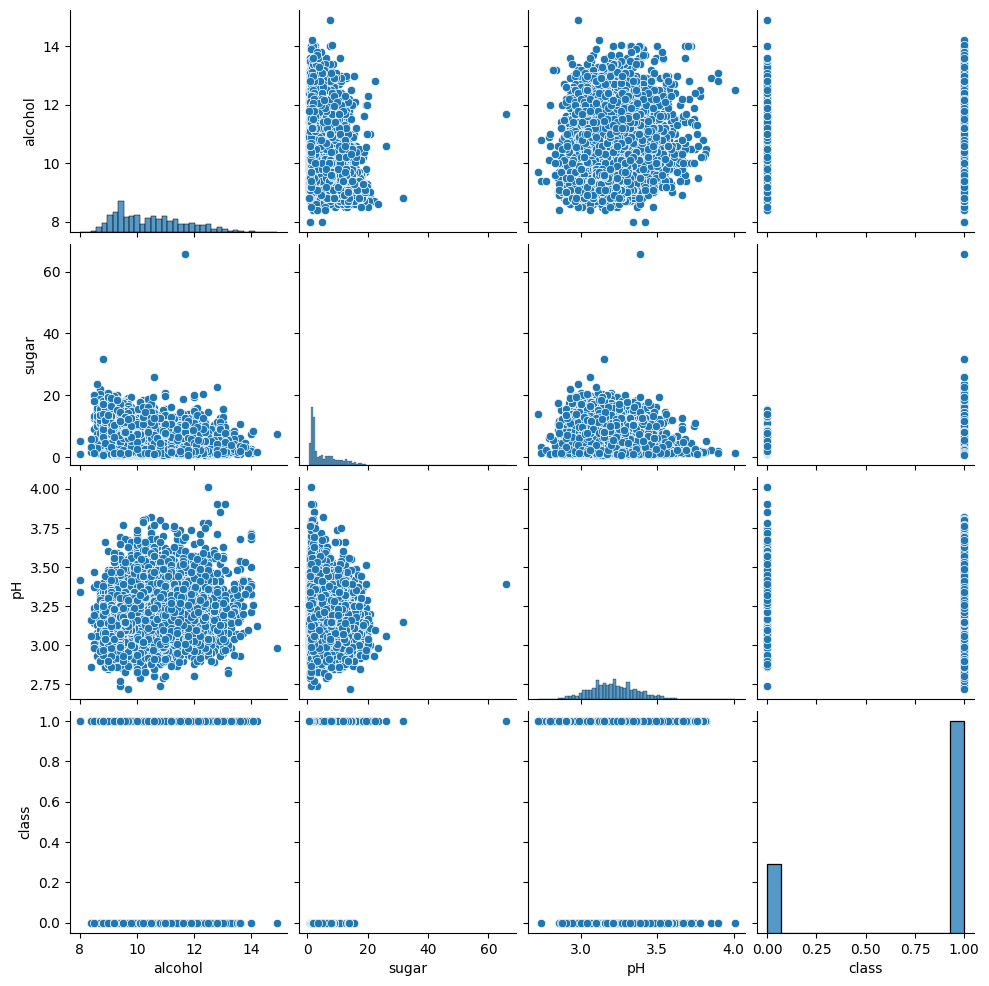

In [9]:
sns.pairplot(data=wine)
plt.show()

## 데이터프레임을 특성 배열, 타겟 배열로 분리

In [10]:
X = wine.iloc[:, :-1].values  # 특성 (2차원) 배열
y = wine['class'].values  # 타겟 (1차원) 배열

In [11]:
X.shape  # 특성 배열의 shape = (n_samples, n_features)

(6497, 3)

In [12]:
y.shape  # 타겟 배열의 shape = (n_samples,)

(6497,)

In [13]:
feature_names = ['alcohol', 'sugar', 'ph']  # 특성의 이름들
target_names = ['red', 'white']  # 타겟의 이름들(0: red, 1: white)

# 훈련, 검증, 테스트 셋 분리

In [14]:
# 훈련 셋, 테스트 셋 분리
X_tr_total, X_te, y_tr_total, y_te = train_test_split(X, y,
                                                      test_size=0.2,
                                                      random_state=42,
                                                      stratify=y)

In [17]:
X_tr_total.shape, X_te.shape, y_tr_total.shape, y_te.shape

((5197, 3), (1300, 3), (5197,), (1300,))

In [18]:
np.unique(y_tr_total, return_counts=True)

(array([0., 1.]), array([1279, 3918]))

In [19]:
np.unique(y_te, return_counts=True)

(array([0., 1.]), array([320, 980]))

In [20]:
# 훈련 셋을 다시 훈련 셋과 검증 셋으로 분리
X_tr, X_val, y_tr, y_val = train_test_split(X_tr_total, y_tr_total,
                                            test_size=0.2,
                                            random_state=42,
                                            stratify=y_tr_total)

In [21]:
X_tr.shape, X_val.shape, y_tr.shape, y_val.shape

((4157, 3), (1040, 3), (4157,), (1040,))

# Decision Tree(의사결정 나무) 분류